## DATASET MV-ASD

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_16s = pd.read_excel('data/MV-ASD-1.xlsx')
df_shotgun= pd.read_excel('data/MV-ASD-1.xlsx',sheet_name='View 2 shotgun')
print(df_16s.shape)
print(df_shotgun.shape)
df_16s.head()

(254, 1325)
(56, 5622)


,Unnamed: 0,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Defluviitaleaceae;_g__Defluviitaleaceae_UCG-011;_s__Lachnospiraceae_bacterium_feline_oral_taxon_001,d__Bacteria;_k__norank;_p__Proteobacteria;_c__Alphaproteobacteria;_o__Sphingomonadales;_f__Sphingomonadaceae;_g__Sphingopyxis;_s__Sphingopyxis_granuli,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Faecalicoccus;_s__unclassified_g__Faecalicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Bacilli;_o__Lactobacillales;_f__Streptococcaceae;_g__Streptococcus;_s__Streptococcus_anginosus_subsp._anginosus,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mollicutes;_o__Mollicutes_RF9;_f__norank_o__Mollicutes_RF9;_g__norank_o__Mollicutes_RF9;_s__uncultured_bacterium_g__norank_o__Mollicutes_RF9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Negativicoccus;_s__uncultured_bacterium_g__Negativicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Erysipelatoclostridium;_s__[Clostridium]_spiroforme,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__Bacteroides_coprophilus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_9;_s__uncultured_organism_g__Ruminiclostridium_9,...,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Porphyromonadaceae;_g__Porphyromonas;_s__unclassified_g__Porphyromonas.1,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__unclassified_o__Clostridiales;_g__unclassified_o__Clostridiales;_s__unclassified_o__Clostridiales.14,d__Bacteria;_k__norank;_p__Proteobacteria;_c__Alphaproteobacteria;_o__Sphingomonadales;_f__Sphingomonadaceae;_g__Blastomonas;_s__uncultured_alpha_proteobacterium_g__Blastomonas,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__unclassified_g__Bacteroides.23,d__Bacteria;_k__norank;_p__Actinobacteria;_c__Actinobacteria;_o__Coriobacteriales;_f__Coriobacteriaceae;_g__Parvibacter;_s__uncultured_bacterium_g__Parvibacter,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminococcaceae_UCG-009;_s__uncultured_bacterium_g__Ruminococcaceae_UCG-009,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Lachnospiraceae;_g__Catonella;_s__unclassified_g__Catonella,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Christensenellaceae;_g__Christensenellaceae_R-7_group;_s__unclassified_g__Christensenellaceae_R-7_group.10,IndexS,IndexN
0,A1,0,0,0,0,0,1,0,0,50,...,1,0,0,0,0,0,0,0,A,1
1,A10,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,A,10
2,A100,0,0,0,0,1,0,0,485,13,...,0,0,0,0,0,0,0,0,A,100
3,A101,0,0,0,0,0,0,1,142,17,...,0,0,0,0,0,0,0,0,A,101
4,A102,0,0,0,0,0,0,0,1,9,...,0,0,0,0,0,0,0,0,A,102


In [79]:
# Effettuo il merge usando outer join sulla colonna 'Unnamed: 0'
df_merged = pd.merge(df_16s, df_shotgun, 
                    on='Unnamed: 0', 
                    how='outer',
                    suffixes=('_16s', '_shotgun'))

In [80]:
# Dimensioni del nuovo dataset
print("Shape del dataset unito:", df_merged.shape)

# Numero di valori NaN
print("Numero di valori NaN:", df_merged.isna().sum().sum())

# Verifica delle prime righe
print(df_merged.head())

Shape del dataset unito: (254, 6946)
Numero di valori NaN: 1112958
  Unnamed: 0  \
0         A1   
1        A10   
2       A100   
3       A101   
4       A102   

   d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Defluviitaleaceae;_g__Defluviitaleaceae_UCG-011;_s__Lachnospiraceae_bacterium_feline_oral_taxon_001  \
0                                                  0                                                                                                                                
1                                                  0                                                                                                                                
2                                                  0                                                                                                                                
3                                                  0                                                            

In [81]:
# Verifica quante righe hanno dati solo dal 16S, solo dallo shotgun, o da entrambi
non_nan_16s = df_merged.filter(like='_16s').notna().any(axis=1)
non_nan_shotgun = df_merged.filter(like='_shotgun').notna().any(axis=1)

print("Righe con solo dati 16S:", (non_nan_16s & ~non_nan_shotgun).sum())
print("Righe con solo dati shotgun:", (~non_nan_16s & non_nan_shotgun).sum())
print("Righe con entrambi i dati:", (non_nan_16s & non_nan_shotgun).sum())

# Verifica se ci sono colonne duplicate
print("\nColonne duplicate:", df_merged.columns.duplicated().sum())

Righe con solo dati 16S: 198
Righe con solo dati shotgun: 0
Righe con entrambi i dati: 56

Colonne duplicate: 0


In [82]:
#save the merged dataset
df_merged.to_excel('data/MV-ASD-1_merged.xlsx', index=False)



In [83]:
# Create binary target variable based on sample names
df_merged['target']= df_merged['Unnamed: 0'].apply(lambda x: 1 if 'A' in x else 0)
df_merged[['Unnamed: 0','target']]


,Unnamed: 0,target
0,A1,1
1,A10,1
2,A100,1
3,A101,1
4,A102,1
...,...,...
249,B58,0
250,B59,0
251,B6,0
252,B60,0


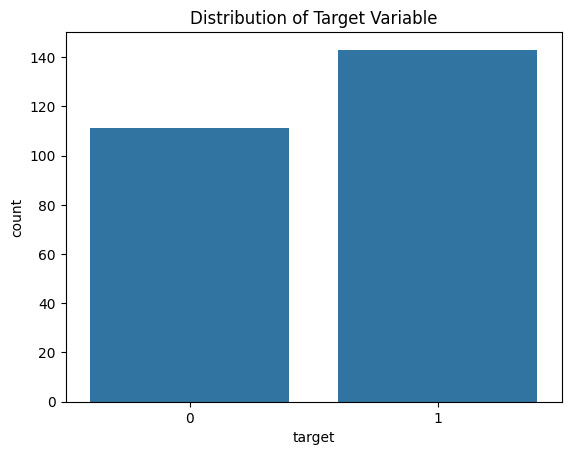

In [84]:
import seaborn as sns
sns.countplot(x='target', data=df_merged)
plt.title('Distribution of Target Variable')
plt.show()

In [85]:
df_merged['target'].value_counts()
df_merged.drop(['Unnamed: 0',"IndexS_16s","IndexS_shotgun","IndexN_16s","IndexN_shotgun"], axis=1, inplace=True)


In [74]:
df_merged.head()

,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Defluviitaleaceae;_g__Defluviitaleaceae_UCG-011;_s__Lachnospiraceae_bacterium_feline_oral_taxon_001,d__Bacteria;_k__norank;_p__Proteobacteria;_c__Alphaproteobacteria;_o__Sphingomonadales;_f__Sphingomonadaceae;_g__Sphingopyxis;_s__Sphingopyxis_granuli,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Faecalicoccus;_s__unclassified_g__Faecalicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Bacilli;_o__Lactobacillales;_f__Streptococcaceae;_g__Streptococcus;_s__Streptococcus_anginosus_subsp._anginosus,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mollicutes;_o__Mollicutes_RF9;_f__norank_o__Mollicutes_RF9;_g__norank_o__Mollicutes_RF9;_s__uncultured_bacterium_g__norank_o__Mollicutes_RF9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Negativicoccus;_s__uncultured_bacterium_g__Negativicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Erysipelatoclostridium;_s__[Clostridium]_spiroforme,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__Bacteroides_coprophilus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_9;_s__uncultured_organism_g__Ruminiclostridium_9,d__Bacteria;_k__norank;_p__Actinobacteria;_c__Actinobacteria;_o__Corynebacteriales;_f__Corynebacteriaceae;_g__Corynebacterium;_s__Corynebacterium_durum,...,g__Sap6virus;s__Enterococcus phage VD13,g__Unclassified;s__Bacillus phage vB_BanS-Tsamsa,g__Unclassified;s__Gordonia phage GTE2,g__Alphabaculovirus;s__Hyphantria cunea nucleopolyhedrovirus,g__Potyvirus;s__Bean common mosaic virus,g__Potyvirus;s__Telosma mosaic virus,g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203,IndexS_shotgun,IndexN_shotgun,target
0,0,0,0,0,0,1,0,0,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0,0,0,0,0,0,0,0,10,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,0,0,0,1,0,0,485,13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0,0,0,0,0,0,1,142,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,101.0,1
4,0,0,0,0,0,0,0,1,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [76]:
# Verifica dei tipi di dati nelle colonne
print(df_merged.dtypes.value_counts())
# Identificare le colonne numeriche
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns
string_columns = df_merged.select_dtypes(include=['object']).columns
# Esempio dei valori nelle colonne non numeriche
for col in string_columns:
    print(f"\nColonna: {col}")
    print(df_merged[col].head())

float64    5620
int64      1324
object        2
Name: count, dtype: int64

Colonna: IndexS_16s
0    A
1    A
2    A
3    A
4    A
Name: IndexS_16s, dtype: object

Colonna: IndexS_shotgun
0    NaN
1    NaN
2    NaN
3      A
4    NaN
Name: IndexS_shotgun, dtype: object


In [86]:
# Supponiamo che 'df' sia il tuo dataframe

# Identificare le colonne da escludere
columns_to_exclude = [ 'target']

# Selezionare solo le colonne numeriche (tutte le colonne tranne quelle da escludere)
numerical_columns = df_merged.drop(columns=columns_to_exclude)

# Aggiungere 1 a tutte le colonne numeriche per evitare la divisione per zero
numerical_columns = numerical_columns + 1

# Calcolare il totale per ogni campione (somma di tutte le colonne numeriche)
total_species = numerical_columns.sum(axis=1)

# Calcolare l'abbondanza relativa per ogni OTU (colonna) in ciascun campione (riga)
relative_abundance = numerical_columns.div(total_species, axis=0)

# Aggiungere le colonne escludenti di nuovo al dataframe dell'abbondanza relativa
relative_abundance[columns_to_exclude] = df_merged[columns_to_exclude]

# Visualizzare o salvare il dataframe risultante
relative_abundance.head()


,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Defluviitaleaceae;_g__Defluviitaleaceae_UCG-011;_s__Lachnospiraceae_bacterium_feline_oral_taxon_001,d__Bacteria;_k__norank;_p__Proteobacteria;_c__Alphaproteobacteria;_o__Sphingomonadales;_f__Sphingomonadaceae;_g__Sphingopyxis;_s__Sphingopyxis_granuli,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Faecalicoccus;_s__unclassified_g__Faecalicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Bacilli;_o__Lactobacillales;_f__Streptococcaceae;_g__Streptococcus;_s__Streptococcus_anginosus_subsp._anginosus,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mollicutes;_o__Mollicutes_RF9;_f__norank_o__Mollicutes_RF9;_g__norank_o__Mollicutes_RF9;_s__uncultured_bacterium_g__norank_o__Mollicutes_RF9,d__Bacteria;_k__norank;_p__Firmicutes;_c__Negativicutes;_o__Selenomonadales;_f__Veillonellaceae;_g__Negativicoccus;_s__uncultured_bacterium_g__Negativicoccus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erysipelotrichia;_o__Erysipelotrichales;_f__Erysipelotrichaceae;_g__Erysipelatoclostridium;_s__[Clostridium]_spiroforme,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__Bacteroidia;_o__Bacteroidales;_f__Bacteroidaceae;_g__Bacteroides;_s__Bacteroides_coprophilus,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Ruminococcaceae;_g__Ruminiclostridium_9;_s__uncultured_organism_g__Ruminiclostridium_9,d__Bacteria;_k__norank;_p__Actinobacteria;_c__Actinobacteria;_o__Corynebacteriales;_f__Corynebacteriaceae;_g__Corynebacterium;_s__Corynebacterium_durum,...,g__Unclassified;s__Enterococcus phage EFDG1,g__Unclassified;s__Podovirus Lau218,g__Sap6virus;s__Enterococcus phage VD13,g__Unclassified;s__Bacillus phage vB_BanS-Tsamsa,g__Unclassified;s__Gordonia phage GTE2,g__Alphabaculovirus;s__Hyphantria cunea nucleopolyhedrovirus,g__Potyvirus;s__Bean common mosaic virus,g__Potyvirus;s__Telosma mosaic virus,g__Unclassified;s__Freshwater phage uvFW-CGR-AMD-COM-C203,target
0,0.000030,0.000030,0.000030,0.000030,0.000030,0.000060,0.000030,0.000030,0.001542,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000333,0.000091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.000030,0.000030,0.000030,0.000030,0.000060,0.000030,0.000030,0.014692,0.000423,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000013,0.000957,0.000120,0.000007,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,1
4,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000060,0.000302,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [87]:
relative_abundance.to_csv(r'C:\Users\Utente\Desktop\SAE-microbiome\francesco_Manco\data\relative_abundance_combined.csv', index=False)

In [88]:
from skbio.stats.composition import clr
import pandas as pd

# Supponiamo che 'relative_abundance' sia il tuo dataframe con l'abbondanza relativa

# Applicare la trasformazione CLR
clr_transformed = pd.DataFrame(clr(relative_abundance.drop(columns=columns_to_exclude)), columns=relative_abundance.drop(columns=columns_to_exclude).columns)

# Aggiungere le colonne escludenti (come 'target', 'IndexS', 'IndexN', etc.) al dataframe trasformato
clr_transformed[columns_to_exclude] = relative_abundance[columns_to_exclude]

# Visualizzare il dataframe CLR trasformato
print(clr_transformed.head())

# Salvare il dataframe trasformato in un file CSV
clr_transformed.to_csv(r'C:\Users\Utente\Desktop\SAE-microbiome\francesco_Manco\data\df_MV-ASD_clr_combined.csv', index=False)


   d__Bacteria;_k__norank;_p__Firmicutes;_c__Clostridia;_o__Clostridiales;_f__Defluviitaleaceae;_g__Defluviitaleaceae_UCG-011;_s__Lachnospiraceae_bacterium_feline_oral_taxon_001  \
0                                                NaN                                                                                                                                
1                                                NaN                                                                                                                                
2                                                NaN                                                                                                                                
3                                          -0.771762                                                                                                                                
4                                                NaN                                           

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

def create_heatmap(excel_file, output_path=None, sheet_name=0):
    """
    Crea una heatmap da un file Excel con alta sensibilità ai cambiamenti di valore.
    
    Parameters:
    excel_file (str): Percorso del file Excel
    output_path (str): Percorso dove salvare l'immagine della heatmap (opzionale)
    sheet_name: Nome o indice del foglio Excel da utilizzare (default: 0)
    """
    try:
        # Leggi il file Excel usando la prima colonna come indice
        print(f"Lettura del file: {excel_file}")
        df = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
        
        # Converti tutti i valori in numerici dove possibile
        numeric_df = df.apply(pd.to_numeric, errors='coerce')
        
        # Verifica se ci sono colonne con tutti valori NaN
        valid_columns = numeric_df.columns[numeric_df.notna().any()]
        if len(valid_columns) < len(df.columns):
            print("\nAlcune colonne sono state escluse perché non contenevano valori numerici validi:")
            print(set(df.columns) - set(valid_columns))
        
        # Usa solo le colonne con valori numerici validi
        numeric_df = numeric_df[valid_columns]
        
        # Imposta le dimensioni della figura
        plt.figure(figsize=(max(12, len(numeric_df.columns)), max(8, len(numeric_df))))
        
        # Crea la heatmap con maggiore sensibilità ai cambiamenti
        heatmap = sns.heatmap(numeric_df,
                             annot=True,  # Mostra i valori nelle celle
                             fmt='.3f',   # Mostra 3 decimali per maggiore precisione
                             cmap='RdYlBu_r',  # Schema colori più adatto per piccole variazioni
                             center=None,  # Rimuovi il centering per massimizzare il contrasto
                             cbar_kws={'label': 'Valore'},
                             linewidths=0.5,
                             square=True,  # Celle quadrate per migliore visualizzazione
                             robust=True)  # Usa quantili robusti per la scala colori
        
        # Personalizza il grafico
        plt.xlabel('Metriche')
        
        # Ruota le etichette per una migliore leggibilità
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        # Aggiusta il layout
        plt.tight_layout()
        
        # Salva l'immagine se viene specificato un percorso
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"\nHeatmap salvata in: {output_path}")
        
        # Mostra la heatmap
        plt.show()
        
    except Exception as e:
        print(f"Errore durante la creazione della heatmap: {str(e)}")
        raise

def process_multiple_files(input_directory, output_directory=None):
    """
    Processa tutti i file Excel in una directory e crea le relative heatmap.
    
    Parameters:
    input_directory (str): Directory contenente i file Excel
    output_directory (str): Directory dove salvare le heatmap (opzionale)
    """
    if output_directory and not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    for filename in os.listdir(input_directory):
        if filename.endswith(('.xlsx', '.xls')):
            input_path = os.path.join(input_directory, filename)
            
            if output_directory:
                output_path = os.path.join(output_directory, 
                                         f"heatmap_{os.path.splitext(filename)[0]}.png")
            else:
                output_path = None
            
            print(f"\nProcessando: {filename}")
            try:
                create_heatmap(input_path, output_path)
            except Exception as e:
                print(f"Errore nel processare {filename}: {str(e)}")
                continue


Processando: ASD_CLR_NO_SHOTGUN_ANALISI.xlsx
Lettura del file: C:\Users\Utente\Desktop\SAE-microbiome\analisi\ASD_CLR_NO_SHOTGUN_ANALISI.xlsx

Heatmap salvata in: C:\Users\Utente\Desktop\SAE-microbiome\analisi_output\heatmap_ASD_CLR_NO_SHOTGUN_ANALISI.png


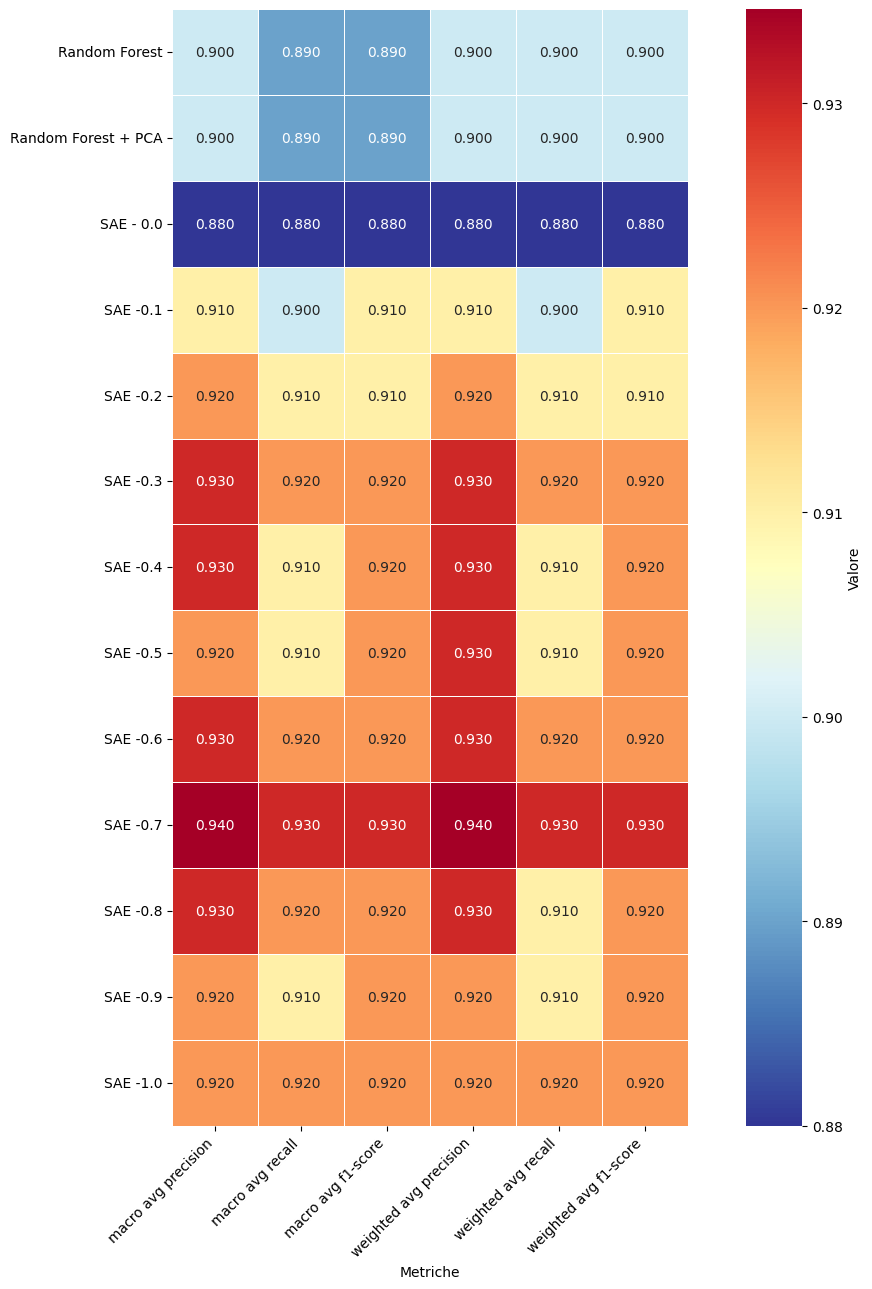


Processando: ASD_CLR_SHOTUGHUN.xlsx
Lettura del file: C:\Users\Utente\Desktop\SAE-microbiome\analisi\ASD_CLR_SHOTUGHUN.xlsx

Heatmap salvata in: C:\Users\Utente\Desktop\SAE-microbiome\analisi_output\heatmap_ASD_CLR_SHOTUGHUN.png


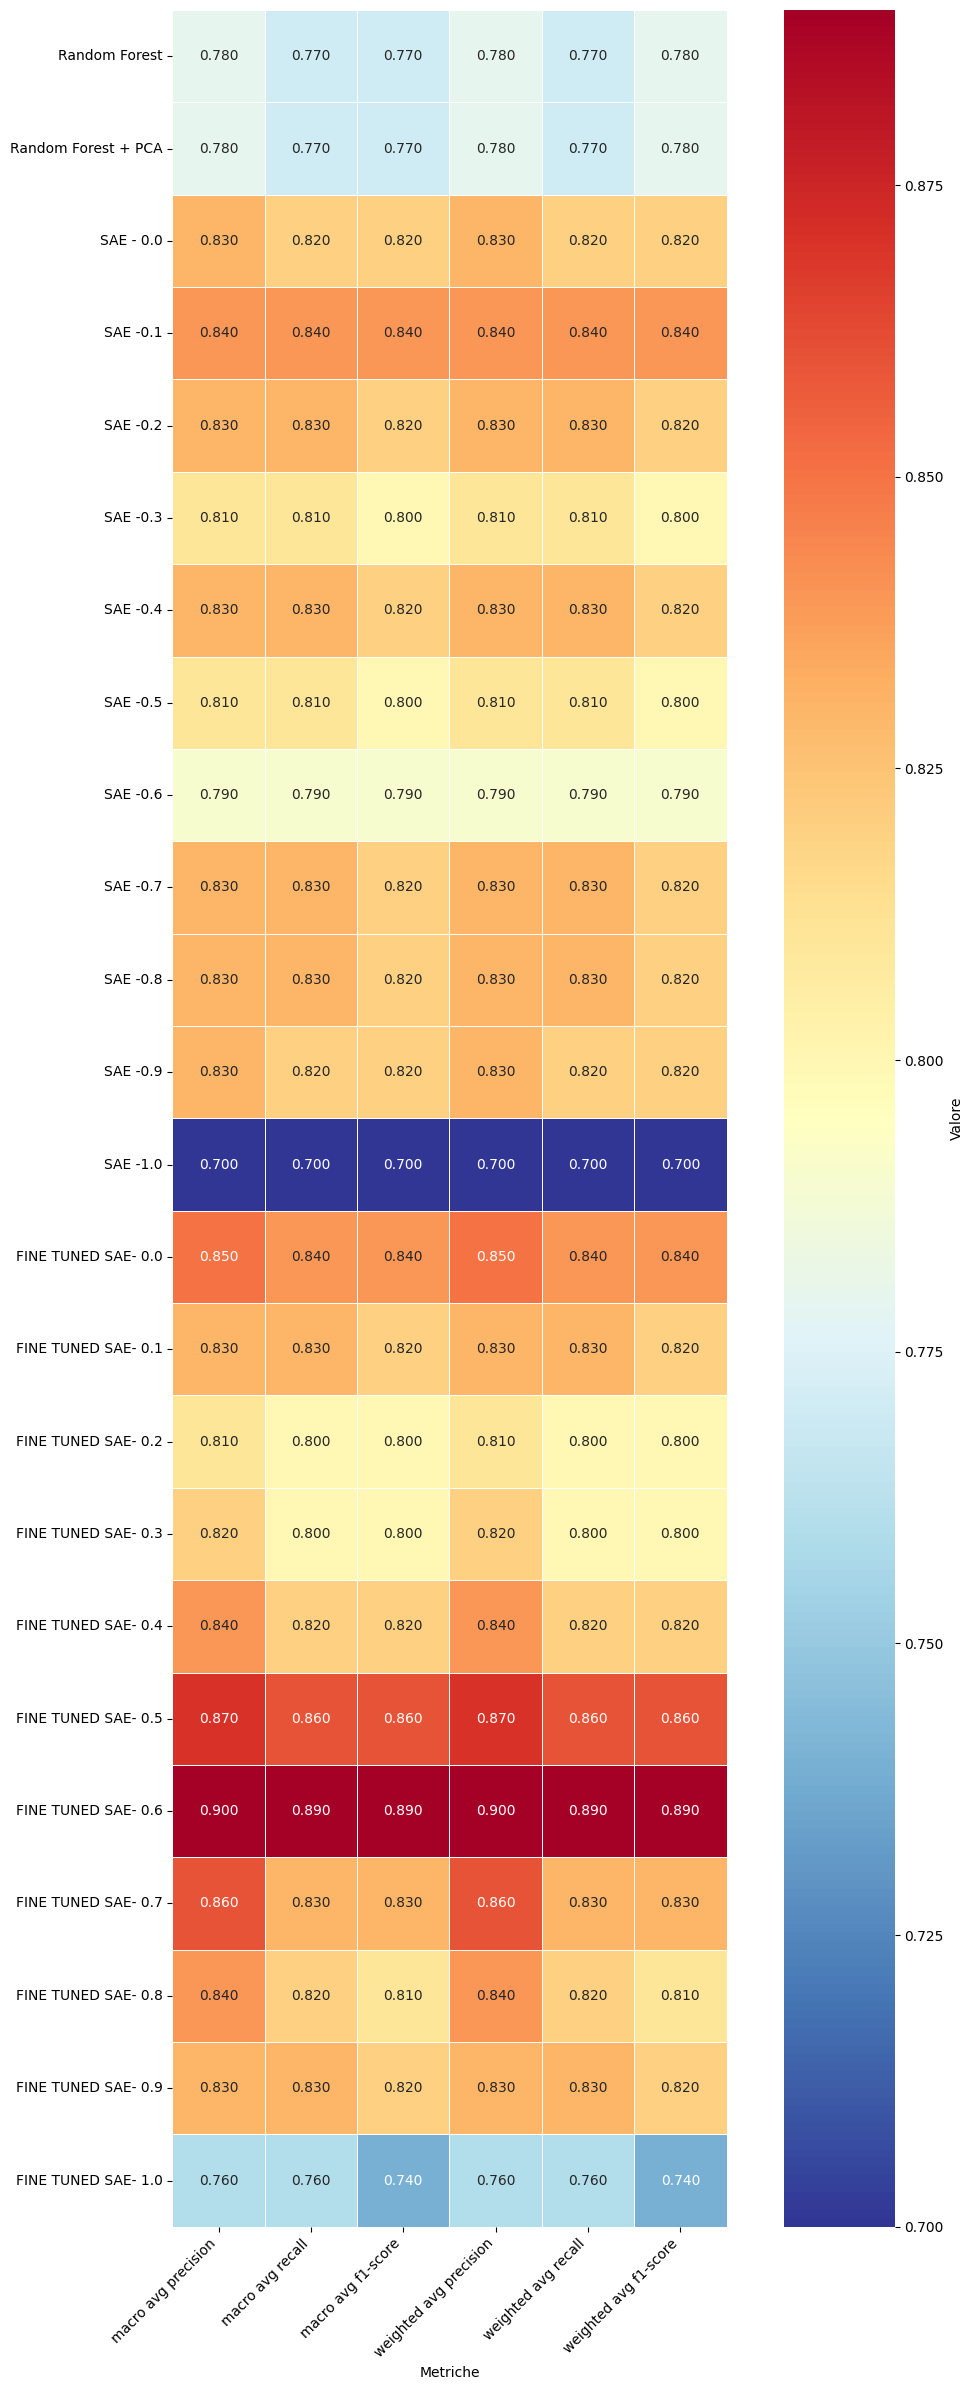


Processando: ASD_PADDING.xlsx
Lettura del file: C:\Users\Utente\Desktop\SAE-microbiome\analisi\ASD_PADDING.xlsx

Alcune colonne sono state escluse perché non contenevano valori numerici validi:
{'Unnamed: 1'}

Heatmap salvata in: C:\Users\Utente\Desktop\SAE-microbiome\analisi_output\heatmap_ASD_PADDING.png


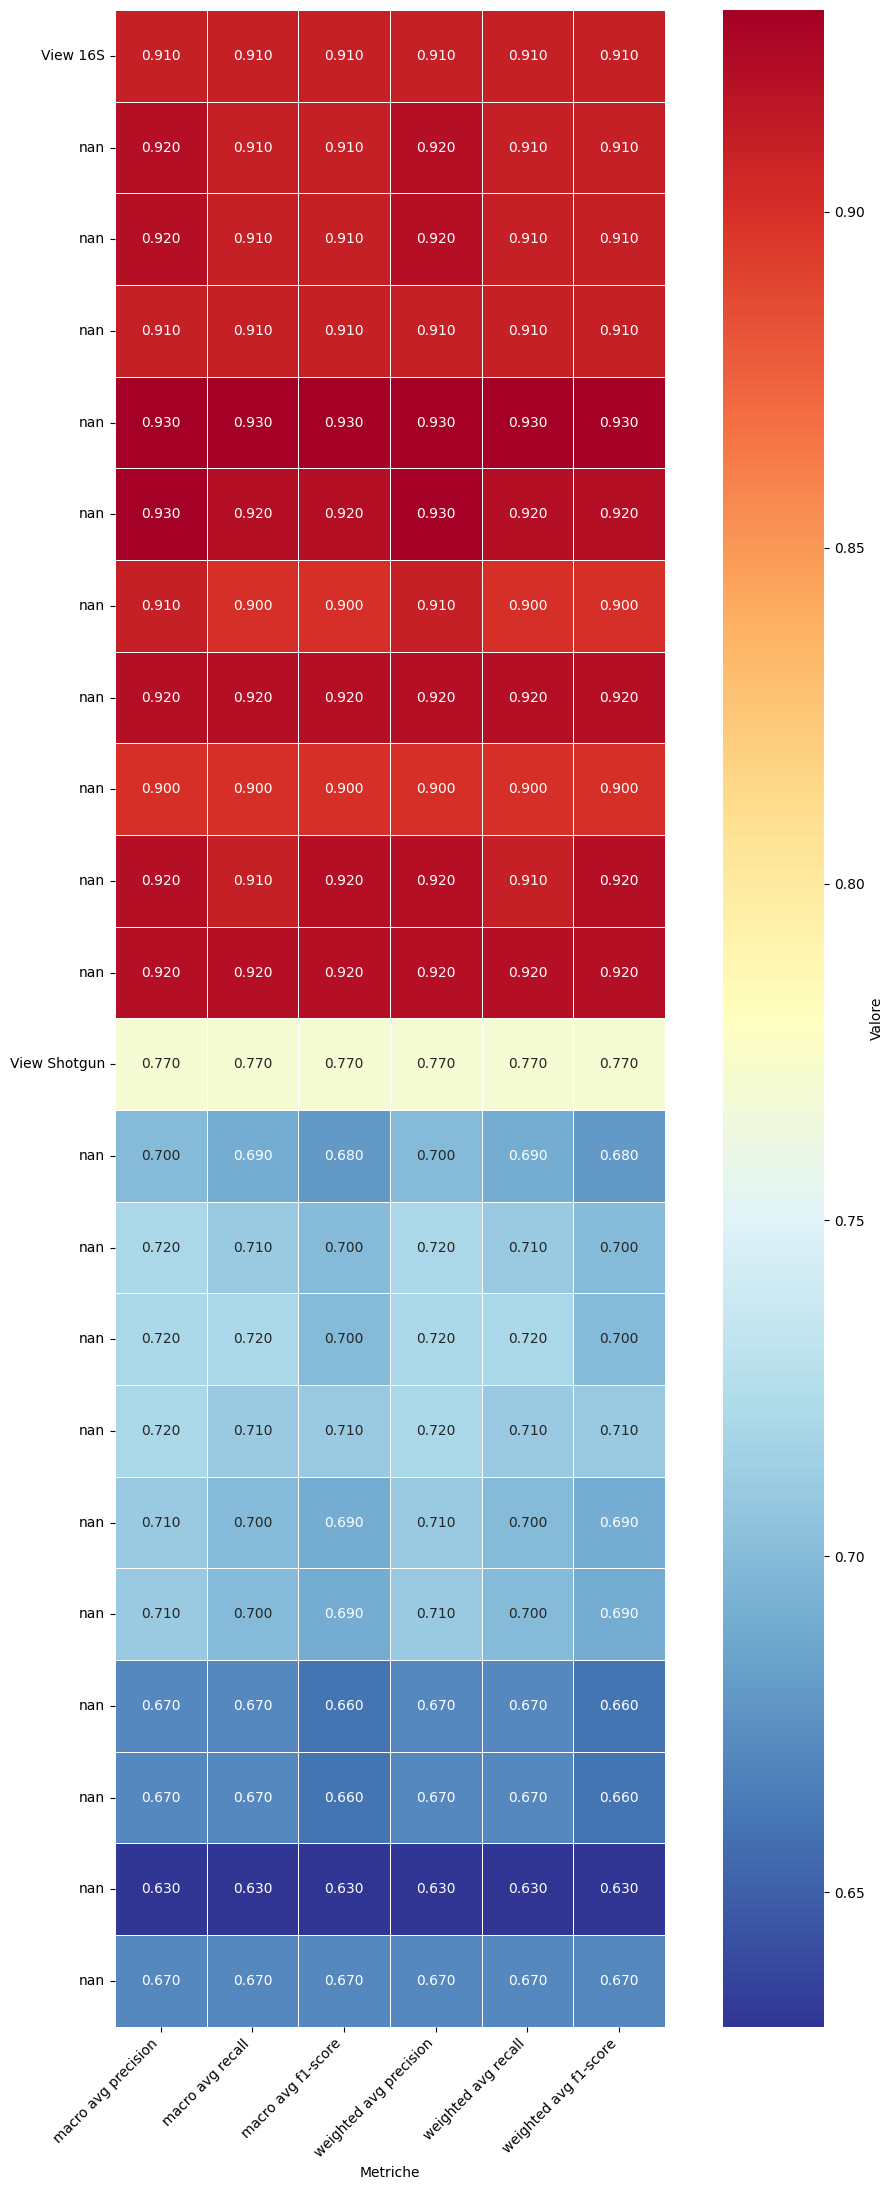

In [8]:
process_multiple_files(r"C:\Users\Utente\Desktop\SAE-microbiome\analisi",r"C:\Users\Utente\Desktop\SAE-microbiome\analisi_output")